# Sanity Check: Large Dataset (40 points)

This notebook verifies that the new `pothos_chater_large` dataset loads correctly and has the expected structure.

## Overview

We verify:
1. Dataset loads successfully
2. Dataset has 40 points (20 per category)
3. Features are in [0, 1] range
4. Visualize 2D scatter plot with category colors
5. Print dataset statistics
6. Visualize distribution with histograms


## 1. Import Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Add parent directory to path for imports
sys.path.insert(0, str(Path('..').resolve()))

from src.data import get_toy_dataset, get_pothos_chater_large

print("Imports successful!")


Imports successful!


## 2. Load Large Dataset


In [2]:
# Load dataset using the generic function
X, y = get_toy_dataset("pothos_chater_large")

# Also load directly to verify
X_direct, y_direct = get_pothos_chater_large()

# Verify they match
assert np.allclose(X, X_direct), "Direct and generic loading should match"
assert np.array_equal(y, y_direct), "Labels should match"

print(f"✓ Dataset loaded successfully")
print(f"  Shape: {X.shape}")
print(f"  Labels shape: {y.shape}")
print(f"  Feature range: [{X.min():.4f}, {X.max():.4f}]")
print(f"  Expected: 40 samples, 2 features, range [0, 1]")


✓ Dataset loaded successfully
  Shape: (40, 2)
  Labels shape: (40,)
  Feature range: [0.0000, 1.0000]
  Expected: 40 samples, 2 features, range [0, 1]


## 3. Dataset Statistics


In [3]:
print("=" * 60)
print("Dataset Statistics")
print("=" * 60)
print(f"Total samples: {len(X)}")
print(f"Feature dimension: {X.shape[1]}")
print(f"\nCategory distribution:")
print(f"  Category A (label 0): {np.sum(y == 0)} samples")
print(f"  Category B (label 1): {np.sum(y == 1)} samples")
print(f"\nFeature statistics:")
print(f"  Feature 0: mean={X[:, 0].mean():.4f}, std={X[:, 0].std():.4f}, min={X[:, 0].min():.4f}, max={X[:, 0].max():.4f}")
print(f"  Feature 1: mean={X[:, 1].mean():.4f}, std={X[:, 1].std():.4f}, min={X[:, 1].min():.4f}, max={X[:, 1].max():.4f}")
print(f"\nCategory A (label 0) statistics:")
X_A = X[y == 0]
print(f"  Feature 0: mean={X_A[:, 0].mean():.4f}, std={X_A[:, 0].std():.4f}")
print(f"  Feature 1: mean={X_A[:, 1].mean():.4f}, std={X_A[:, 1].std():.4f}")
print(f"  Expected prototype: [0.23, 0.27]")
print(f"\nCategory B (label 1) statistics:")
X_B = X[y == 1]
print(f"  Feature 0: mean={X_B[:, 0].mean():.4f}, std={X_B[:, 0].std():.4f}")
print(f"  Feature 1: mean={X_B[:, 1].mean():.4f}, std={X_B[:, 1].std():.4f}")
print(f"  Expected prototype: [0.77, 0.73]")
print(f"\n✓ All values in [0, 1] range: {np.all((X >= 0) & (X <= 1))}")


Dataset Statistics
Total samples: 40
Feature dimension: 2

Category distribution:
  Category A (label 0): 20 samples
  Category B (label 1): 20 samples

Feature statistics:
  Feature 0: mean=0.4859, std=0.2947, min=0.0730, max=1.0000
  Feature 1: mean=0.4944, std=0.2962, min=0.0000, max=0.9155

Category A (label 0) statistics:
  Feature 0: mean=0.2101, std=0.1014
  Feature 1: mean=0.2228, std=0.1291
  Expected prototype: [0.23, 0.27]

Category B (label 1) statistics:
  Feature 0: mean=0.7617, std=0.1066
  Feature 1: mean=0.7660, std=0.1061
  Expected prototype: [0.77, 0.73]

✓ All values in [0, 1] range: True


## 4. 2D Scatter Plot (Colored by Category)


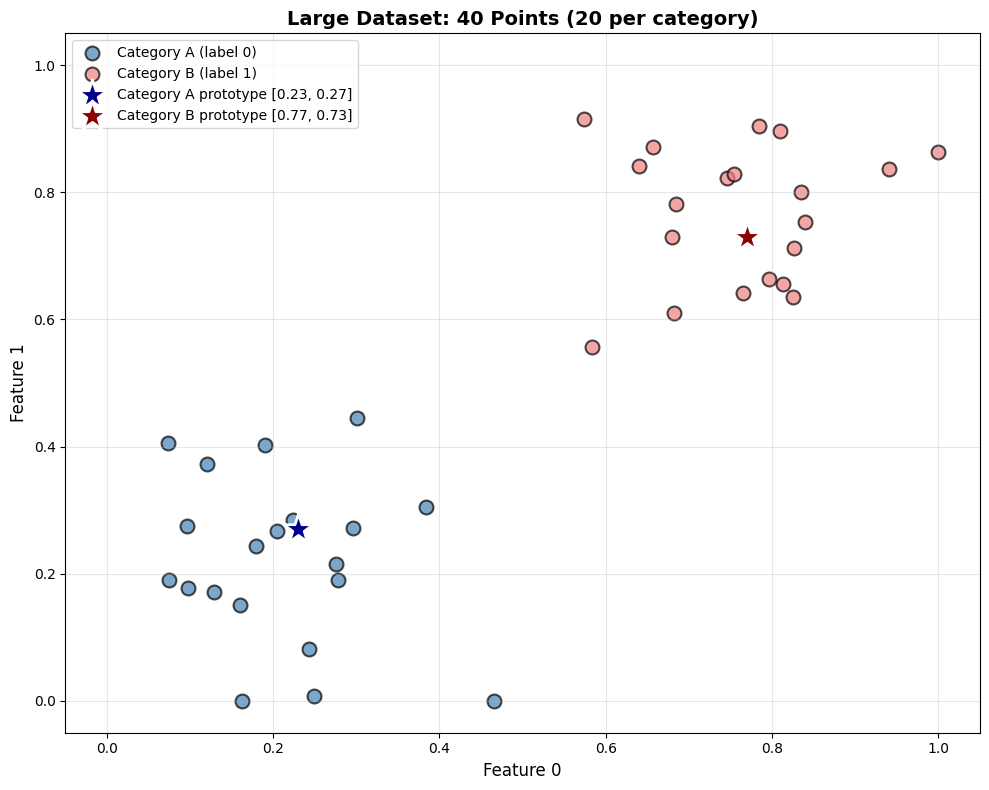

✓ Scatter plot generated


In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot Category A (label 0) in blue
mask_A = y == 0
ax.scatter(X[mask_A, 0], X[mask_A, 1], 
           c='steelblue', label='Category A (label 0)', 
           alpha=0.7, s=100, edgecolors='black', linewidths=1.5)

# Plot Category B (label 1) in coral
mask_B = y == 1
ax.scatter(X[mask_B, 0], X[mask_B, 1], 
           c='lightcoral', label='Category B (label 1)', 
           alpha=0.7, s=100, edgecolors='black', linewidths=1.5)

# Mark expected prototypes
ax.scatter([0.23], [0.27], c='darkblue', marker='*', s=500, 
           label='Category A prototype [0.23, 0.27]', 
           edgecolors='white', linewidths=2, zorder=10)
ax.scatter([0.77], [0.73], c='darkred', marker='*', s=500, 
           label='Category B prototype [0.77, 0.73]', 
           edgecolors='white', linewidths=2, zorder=10)

ax.set_xlabel('Feature 0', fontsize=12)
ax.set_ylabel('Feature 1', fontsize=12)
ax.set_title('Large Dataset: 40 Points (20 per category)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

print("✓ Scatter plot generated")


## 5. Distribution Visualization (Histograms)


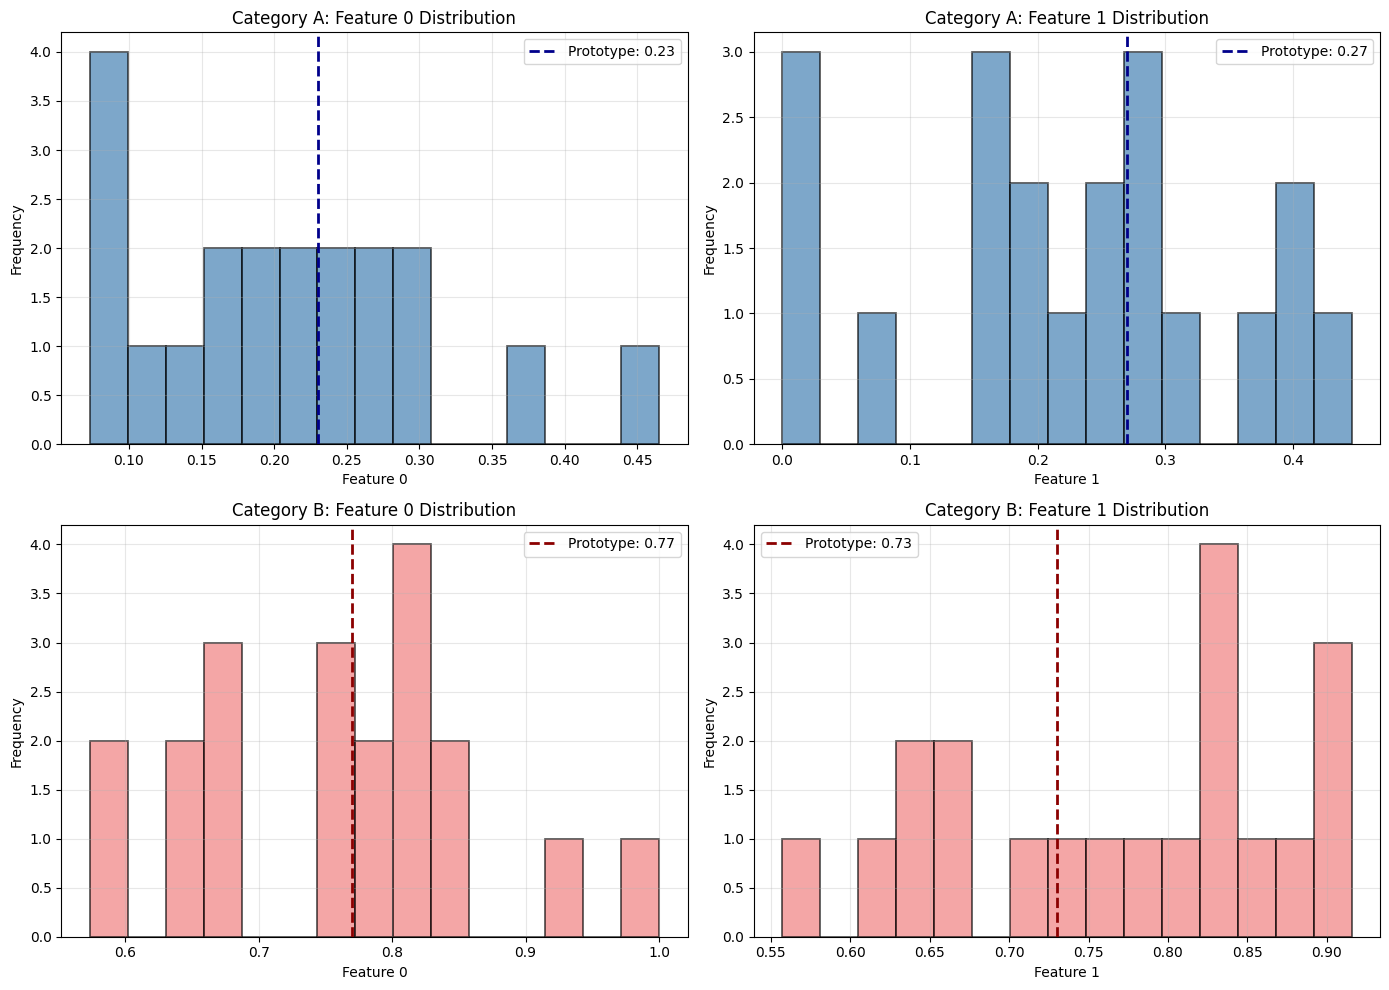

✓ Histograms generated


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Feature 0: Category A
axes[0, 0].hist(X_A[:, 0], bins=15, color='steelblue', alpha=0.7, 
                edgecolor='black', linewidth=1.2)
axes[0, 0].axvline(0.23, color='darkblue', linestyle='--', linewidth=2, 
                   label='Prototype: 0.23')
axes[0, 0].set_xlabel('Feature 0')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Category A: Feature 0 Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Feature 1: Category A
axes[0, 1].hist(X_A[:, 1], bins=15, color='steelblue', alpha=0.7, 
                edgecolor='black', linewidth=1.2)
axes[0, 1].axvline(0.27, color='darkblue', linestyle='--', linewidth=2, 
                   label='Prototype: 0.27')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Category A: Feature 1 Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Feature 0: Category B
axes[1, 0].hist(X_B[:, 0], bins=15, color='lightcoral', alpha=0.7, 
                edgecolor='black', linewidth=1.2)
axes[1, 0].axvline(0.77, color='darkred', linestyle='--', linewidth=2, 
                   label='Prototype: 0.77')
axes[1, 0].set_xlabel('Feature 0')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Category B: Feature 0 Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Feature 1: Category B
axes[1, 1].hist(X_B[:, 1], bins=15, color='lightcoral', alpha=0.7, 
                edgecolor='black', linewidth=1.2)
axes[1, 1].axvline(0.73, color='darkred', linestyle='--', linewidth=2, 
                   label='Prototype: 0.73')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Category B: Feature 1 Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Histograms generated")


## 6. Summary

All checks passed! The large dataset is ready for use.
